In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
dataset['Salary'].value_counts()

Salary
45000      1
50000      1
60000      1
80000      1
110000     1
150000     1
200000     1
300000     1
500000     1
1000000    1
Name: count, dtype: int64

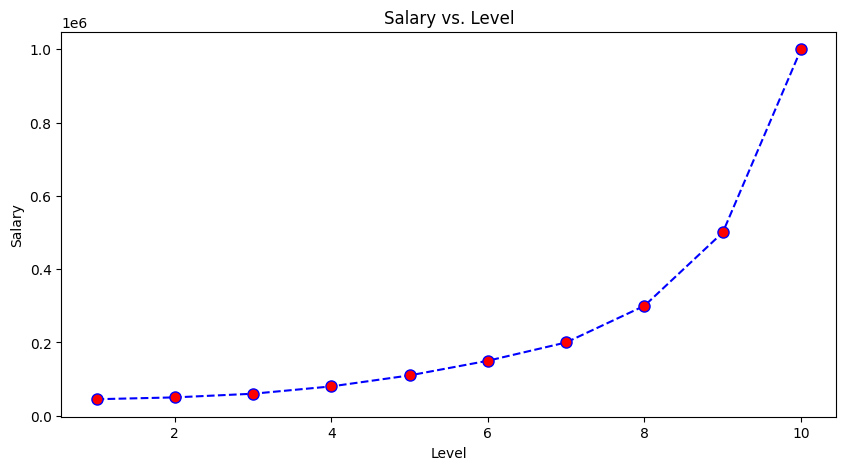

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), dataset['Salary'], color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Salary vs. Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [8]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X, y)

LinearRegression()

# making the polynomial regression model

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y)

LinearRegression()

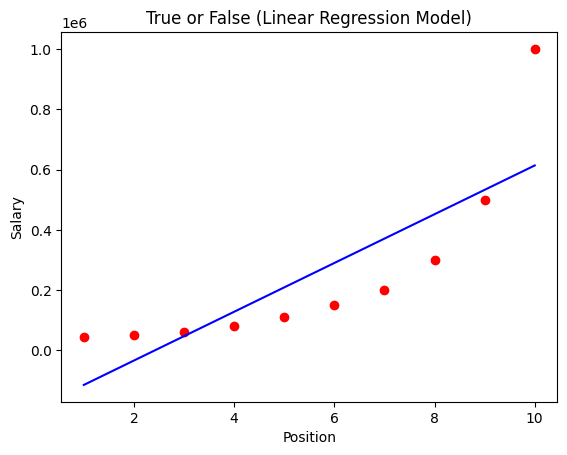

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('True or False (Linear Regression Model)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

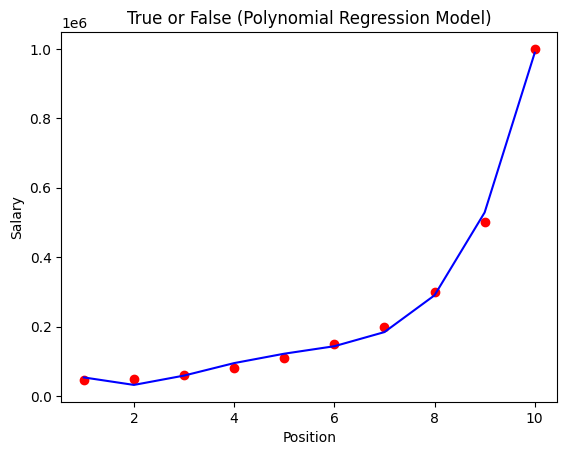

In [12]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor2.predict(X_poly), color='blue')
plt.title('True or False (Polynomial Regression Model)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [13]:
regressor.predict([[6.5]])

array([330378.78787879])

In [14]:
regressor2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# High Resolution Visualization

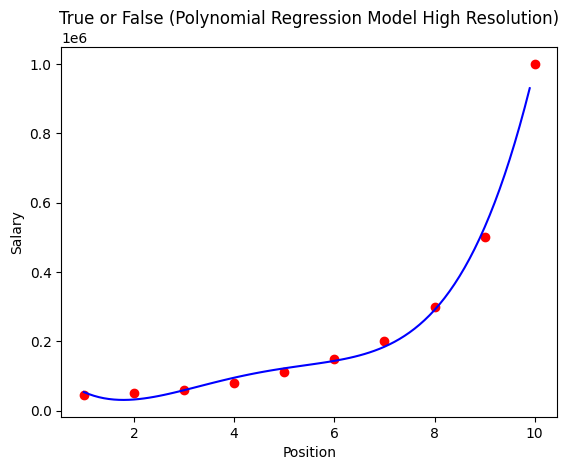

In [15]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('True or False (Polynomial Regression Model High Resolution)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# DONE